In [43]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Input

import numpy as np
import matplotlib.pyplot as plt

import cv2

In [44]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

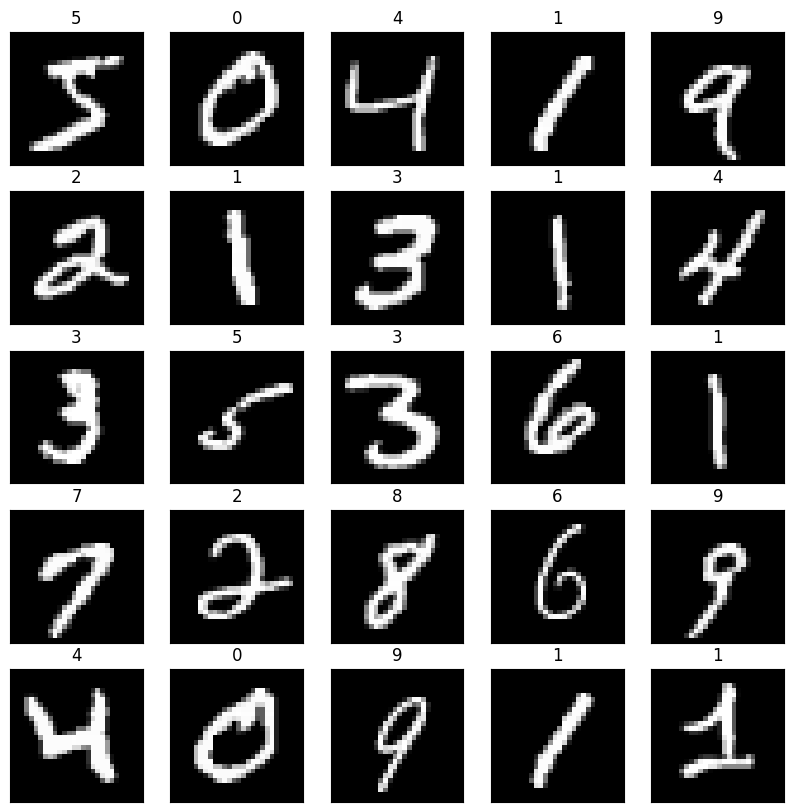

In [45]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap="grey")
    plt.title(y_train[i])

In [46]:
model = keras.Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
x_train = x_train / 255
x_test = x_test / 255

In [48]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

In [49]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [50]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9193 - loss: 0.2824 - val_accuracy: 0.9548 - val_loss: 0.1545
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9627 - loss: 0.1250 - val_accuracy: 0.9663 - val_loss: 0.1158
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9743 - loss: 0.0856 - val_accuracy: 0.9719 - val_loss: 0.0974
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9811 - loss: 0.0641 - val_accuracy: 0.9723 - val_loss: 0.0948
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0486 - val_accuracy: 0.9734 - val_loss: 0.0874
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9882 - loss: 0.0391 - val_accuracy: 0.9720 - val_loss: 0.0907
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9915 - loss: 0.0298 - val_accuracy: 0.9747 - val_loss: 0.0889
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9927 - loss: 0.0242 - 

In [51]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.0844


[0.08437179028987885, 0.9776999950408936]

In [52]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [53]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]
y_false = y_test[~mask]

print(x_false.shape)
print(p_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(223, 28, 28)
(223,)


NN prediction: 6, True_value: 4


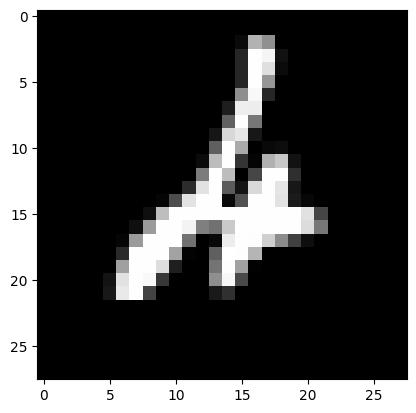

NN prediction: 7, True_value: 2


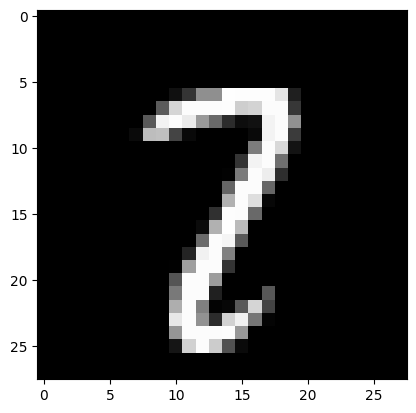

NN prediction: 3, True_value: 5


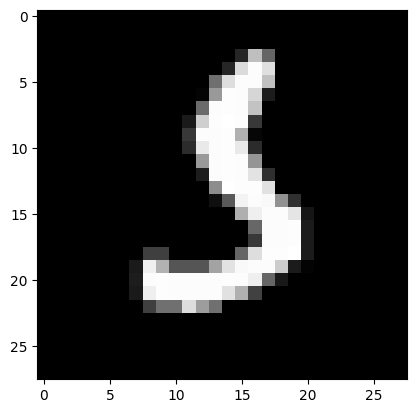

NN prediction: 0, True_value: 6


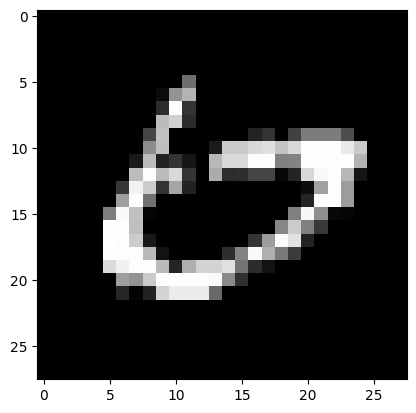

NN prediction: 2, True_value: 8


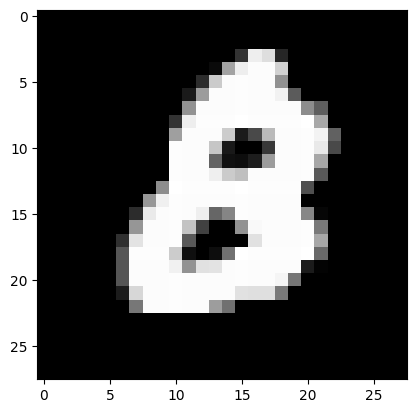

NN prediction: 2, True_value: 8


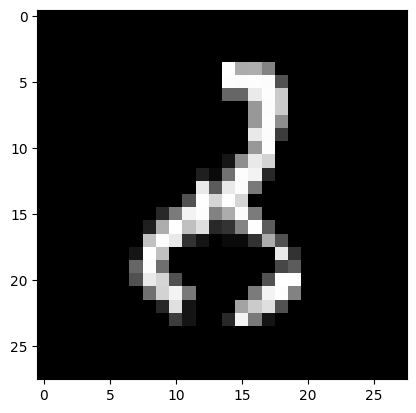

NN prediction: 8, True_value: 2


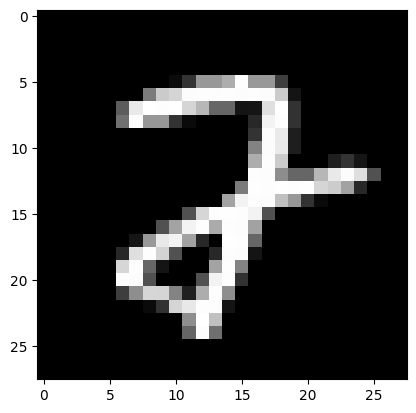

NN prediction: 8, True_value: 1


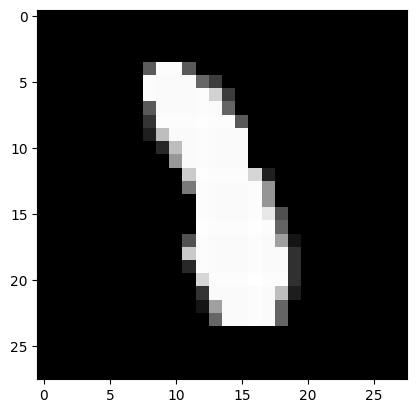

NN prediction: 1, True_value: 2


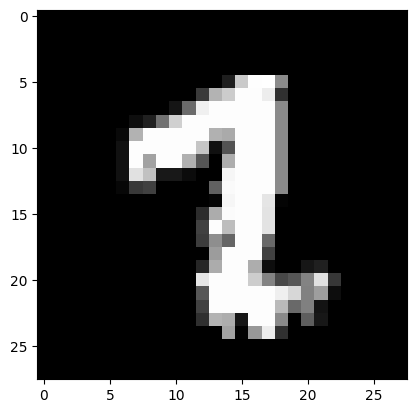

NN prediction: 3, True_value: 7


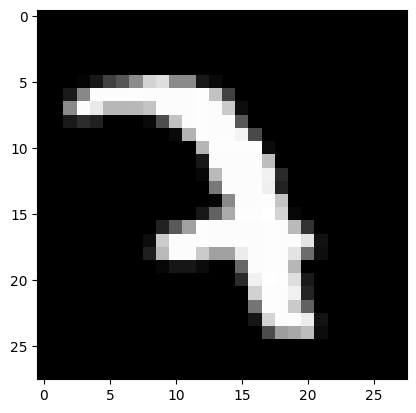

NN prediction: 4, True_value: 8


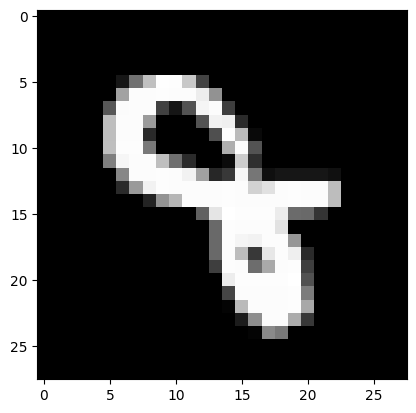

NN prediction: 6, True_value: 0


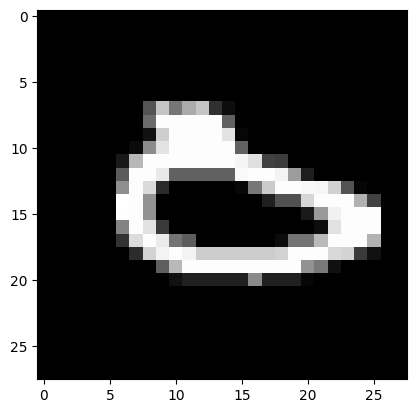

NN prediction: 8, True_value: 5


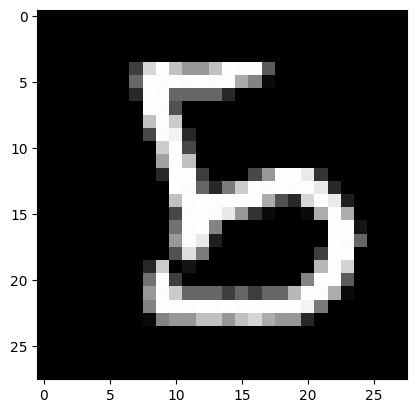

NN prediction: 5, True_value: 3


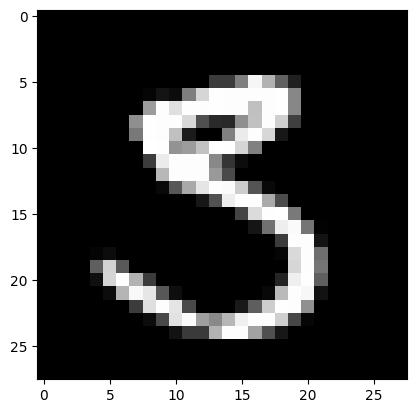

NN prediction: 9, True_value: 8


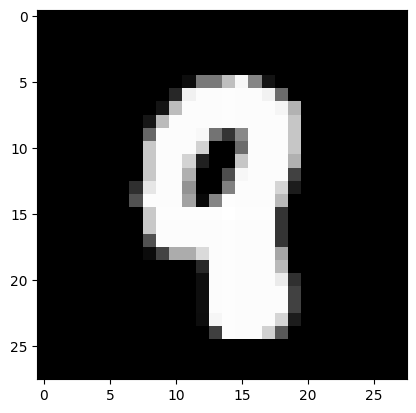

In [54]:
for i in range(15):
    print(f"NN prediction: {p_false[i]}, True_value: {y_false[i]}")
    plt.imshow(x_false[i], cmap='grey')
    plt.show()

In [55]:
[i.shape for i in model.get_weights()]

[(784, 128), (128,), (128, 10), (10,)]

In [65]:
img = cv2.imread("1.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)


(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted digit: 4


In [72]:
img = cv2.imread("1_.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted digit: 1


In [67]:
img = cv2.imread("2.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)


(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted digit: 6


In [73]:
img = cv2.imread("2_.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit: 2


In [68]:
img = cv2.imread("3.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted digit: 3


In [79]:
img = cv2.imread("4.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted digit: 6


In [80]:
img = cv2.imread("4_.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted digit: 4


In [69]:
img = cv2.imread("5.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted digit: 6


In [74]:
img = cv2.imread("5_.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted digit: 5


In [81]:
img = cv2.imread("6.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit: 8


In [84]:
img = cv2.imread("6_.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted digit: 6


In [86]:
img = cv2.imread("7_.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted digit: 2


In [87]:
img = cv2.imread("7__.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit: 7


In [88]:
img = cv2.imread("8.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted digit: 8


In [71]:
img = cv2.imread("9.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted digit: 7


In [78]:
img = cv2.imread("9_.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img.astype("float32") / 255.0

img = img.reshape(1, 28, 28)  

print(img.shape)            

pred = model.predict(img)
digit = np.argmax(pred)

print("Predicted digit:", digit)

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted digit: 9
